In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
from sklearn import linear_model
from sklearn import model_selection
from sklearn import metrics
from sklearn import preprocessing

### Linearna regresija nad stvarnim podacima

In [3]:
from sklearn import datasets

In [4]:
data = datasets.load_boston()

### Analiza podataka

In [ ]:
print(data.DESCR)

In [ ]:
data.feature_names

In [29]:
number_of_features = len(data.feature_names)
number_of_features

13

In [9]:
X = data.data # features

In [10]:
X.shape

(506, 13)

In [11]:
y = data.target # target variable

In [12]:
y.shape

(506,)

In [13]:
X = pd.DataFrame(data.data, columns=data.feature_names) # za dalji rad nam treba DataFrame
y = pd.DataFrame(data.target, columns=['MEDV'])

In [ ]:
X.head()

In [ ]:
y.head()

In [ ]:
X.info() # all float columns and no missing data

In [ ]:
X.dtypes # tipovi podataka

In [ ]:
X.isna().sum() # nedostajuci podaci

In [ ]:
X.describe() # primetiti da podaci nisu na istim skalama

In [ ]:
X.hist(figsize = [15,15]) # feature distribution

In [ ]:
y.hist() # target distribution

### Priprema za treniranje modela

Praksa: skup za treniranje i skup za testiranje u razmeri 2:1

In [14]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.33, random_state = 23)

In [15]:
# Standardizacija
scaler = preprocessing.StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:
X_train_scaled_df = pd.DataFrame(X_train_scaled)

In [17]:
X_train_scaled_df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,3.390000e+02,3.390000e+02,3.390000e+02,3.390000e+02,3.390000e+02,3.390000e+02,3.390000e+02,3.390000e+02,3.390000e+02,3.390000e+02,3.390000e+02,3.390000e+02,3.390000e+02
mean,2.389108e-16,1.539247e-17,3.878576e-15,-1.296898e-16,-8.106266e-15,-4.977500e-15,1.590337e-15,1.190460e-15,6.910238e-17,-1.316548e-16,2.273206e-14,8.585070e-15,2.006916e-15
std,1.001478e+00,1.001478e+00,1.001478e+00,1.001478e+00,1.001478e+00,1.001478e+00,1.001478e+00,1.001478e+00,1.001478e+00,1.001478e+00,1.001478e+00,1.001478e+00,1.001478e+00
min,-4.097890e-01,-5.172441e-01,-1.545737e+00,-3.000536e-01,-1.407974e+00,-4.090984e+00,-2.219129e+00,-1.338652e+00,-9.661187e-01,-1.295779e+00,-2.774650e+00,-3.823485e+00,-1.491176e+00
25%,-4.015548e-01,-5.172441e-01,-8.498142e-01,-3.000536e-01,-8.911120e-01,-5.921381e-01,-8.506286e-01,-8.421914e-01,-6.143311e-01,-7.533525e-01,-5.153874e-01,2.000196e-01,-7.931914e-01
50%,-3.838344e-01,-5.172441e-01,-1.877312e-01,-3.000536e-01,-2.105769e-01,-1.049761e-01,2.075622e-01,-2.564001e-01,-4.970686e-01,-4.399504e-01,2.847682e-01,3.703406e-01,-1.643704e-01
75%,-8.885264e-02,3.091763e-01,1.049628e+00,-3.000536e-01,6.508601e-01,4.949550e-01,9.449835e-01,6.845605e-01,-1.452810e-01,1.585109e+00,8.025160e-01,4.148448e-01,5.604322e-01
max,8.169537e+00,3.614858e+00,2.467957e+00,3.332738e+00,2.778609e+00,3.181864e+00,1.166384e+00,3.140266e+00,1.730920e+00,1.856322e+00,1.649740e+00,4.211410e-01,3.597263e+00


### Treniranje modela

In [18]:
model = linear_model.LinearRegression()

In [19]:
model.fit(X_train_scaled, y_train)

LinearRegression()

In [20]:
model.coef_, model.intercept_

(array([[-0.75625033,  1.04585969, -0.07764512,  0.90888155, -1.93203595,
          2.87034842,  0.02231398, -2.97257179,  2.38753199, -1.40846086,
         -1.77263078,  1.42304907, -3.85542219]]),
 array([22.66843658]))

In [ ]:
for feature, coef in zip(data.feature_names, model.coef_.ravel()):
    print (feature, coef)

In [ ]:
model.intercept_

In [ ]:
eq = f'{model.intercept_[0]}'
for feature, coef in zip(data.feature_names, model.coef_.ravel()):
    eq = f'{coef}*{feature} + ' + eq
print('Jednacina modela: \n', eq)

### Evaluacija modela

In [21]:
y_predicted = model.predict(X_test_scaled)

In [22]:
metrics.mean_squared_error(y_predicted, y_test)

24.554333387831328

In [23]:
model.score(X_test_scaled, y_test)

0.695804677539376

### Analiza atributa

In [ ]:
X.corr() # correlation matrix

In [ ]:
X.corr().style.background_gradient(cmap='coolwarm')

In [ ]:
# TAX & RAD visoko korelisani, takodje znacajno DIS i INDUS

In [ ]:
X.corr().loc['RAD']['TAX']

In [ ]:
# koliko nam je svaki atribut znacajan za predikciju?

In [24]:
corrcoefs = []
for feature in data.feature_names: 
    corrcoef = np.corrcoef(X[feature].values, y.MEDV)[0, 1] # calculate correlation between feature and target variable
    corrcoefs.append(corrcoef)
    print(feature, corrcoef)

CRIM -0.3883046085868113
ZN 0.36044534245054277
INDUS -0.4837251600283727
CHAS 0.17526017719029854
NOX -0.42732077237328264
RM 0.6953599470715395
AGE -0.3769545650045963
DIS 0.24992873408590388
RAD -0.38162623063977763
TAX -0.468535933567767
PTRATIO -0.5077866855375617
B 0.33346081965706653
LSTAT -0.7376627261740147


In [ ]:
corrcoefs

In [ ]:
# RM i LSTAT deluju kao veoma jaki prediktori

In [26]:
corrcoefs = pd.Series(corrcoefs, index=data.feature_names).sort_values()

In [27]:
corrcoefs

LSTAT     -0.737663
PTRATIO   -0.507787
INDUS     -0.483725
TAX       -0.468536
NOX       -0.427321
CRIM      -0.388305
RAD       -0.381626
AGE       -0.376955
CHAS       0.175260
DIS        0.249929
B          0.333461
ZN         0.360445
RM         0.695360
dtype: float64

[]

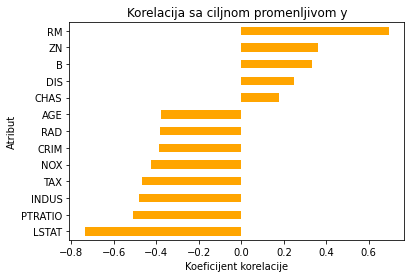

In [30]:
corrcoefs.plot(kind="barh", color='orange')

plt.title("Korelacija sa ciljnom promenljivom y")
plt.ylabel('Atribut')
plt.xlabel('Koeficijent korelacije')
plt.yticks(np.arange(number_of_features),
           list(corrcoefs.index))
plt.plot()

In [ ]:
corrcoefs[np.abs(corrcoefs)>0.33]

In [ ]:
X_subset = X[['RM', 'ZN', 'B', 'AGE', 'CRIM', 'TAX', 'NOX', 'INDUS', 'PTRATIO', 'LSTAT']]

In [ ]:
X_subset.shape

In [ ]:
X_subset.corr()

### Novi model

In [ ]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_subset, y, test_size = 0.33, random_state = 42)

In [ ]:
scaler = preprocessing.StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
model = linear_model.LinearRegression()

In [ ]:
model.fit(X_train_scaled, y_train)

In [ ]:
for feature, coef in zip(X_subset.columns, model.coef_.ravel()):
    print (feature, coef)

In [ ]:
model.intercept_

In [ ]:
y_predicted = model.predict(X_test_scaled)

In [ ]:
metrics.mean_squared_error(y_predicted, y_test)

In [ ]:
model.score(X_test_scaled, y_test) 

### Cuvanje modela

In [ ]:
import pickle

In [ ]:
model_filename = 'boston_houses.model'

In [ ]:
with open(model_filename, 'wb') as pickle_file:
    pickle.dump(model, pickle_file)

In [ ]:
scaler_filename = 'boston_houses.scaler'

In [ ]:
with open(scaler_filename, 'wb') as pickle_file:
    pickle.dump(scaler, pickle_file)

### Ponovno koriscenje

In [ ]:
with open(model_filename, 'rb') as pickle_file:
    model_load = pickle.load(pickle_file)

In [ ]:
with open(scaler_filename, 'rb') as pickle_file:
    scaler_load = pickle.load(pickle_file)

## Rekurzivna eliminacija atributa

Rekurzivna elminacija atributa (engl. Recursive Feature Elimination, RFE) je rekurzivna tehnika kojom se u svakom koraku eliminise  najmanje vazan atribut na osnovu njihove izracunate vaznosti.  

In [ ]:
from sklearn import feature_selection

In [ ]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.33, random_state = 7)

In [ ]:
scaler = preprocessing.StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
model = linear_model.LinearRegression()

In [ ]:
rfe = feature_selection.RFE(model, n_features_to_select=10, verbose=1) 
# n_features_to_select je broj atributa koje treba izabrati

In [ ]:
rfe.fit(X_train_scaled, y_train)

In [ ]:
rfe.support_

In [ ]:
data.feature_names[rfe.support_]

In [ ]:
data.feature_names[~rfe.support_]

In [ ]:
X_train_rfe = rfe.transform(X_train_scaled)
X_test_rfe = rfe.transform(X_test_scaled)

In [ ]:
X_train_rfe.shape # modifikovani skup atributa

In [ ]:
# Novi model
model.fit(X_train_rfe, y_train)

In [ ]:
model.score(X_test_rfe, y_test)